In [5]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


In [14]:
x = np.array([-3 + i for i in range(7)])
x = np.pi * x

y = np.sin(x)/(x)

/tmp/ipykernel_10961/689885876.py:3: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(x)/(x)


In [15]:
y

array([ 3.89817183e-17, -3.89817183e-17,  3.89817183e-17,             nan,
        3.89817183e-17, -3.89817183e-17,  3.89817183e-17])

In [10]:
plt.plot(x, np.sin(np.pi * x)/(np.pi * x) )

TypeError: can't multiply sequence by non-int of type 'float'

In [159]:
def plot_graph(w_n, h1):
    plt.plot(w_n,h1)
    plt.ylim(-100, 5)
    plt.xlim(0.15, 0.4)

    plt.ylabel("Magnitude (db)")
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Frequency response')


In [167]:
def filter_analyse(b, graph = False):
    result = True
    w, h = signal.freqz(b)
    w_n = w/max(w)
    h_n = 20 * np.log10 (abs(h))

    if graph:
        plot_graph(w_n, h_n)

    max_passband = h_n[0]
    min_passband = h_n[0]


    for x, y in zip(w_n, h_n):
        if x < 0.2:
            if y < -3:
                return False
            min_passband = min_passband if y < min_passband else y
            max_passband = max_passband if y > max_passband else y
            if (max_passband - min_passband) > 1:
                return False
        if x > 0.24 and y > -60:
            return False

    return True


In [165]:
def filter_brute_force():
    res_fin = 1000
    data = (0, 0)
    windows = ['boxcar', 'triang', 'blackman', 'hamming', 'hann', 'bartlett', 'flattop', 'parzen', 'bohman', 
               'blackmanharris', 'nuttall', 'barthann', 'cosine', 'exponential', 'tukey', 'taylor']
    for shift in range(100): 
        for window_name in windows:
            res = 100
            while True:
                b = signal.firwin(res, 0.2 + 0.0001 *shift , pass_zero = 'lowpass', window = window_name)
                if filter_analyse(b):
                    if res < res_fin:
                        data = (res, window_name, 0.2+ 0.0001 * shift) 
                        res_fin = res

                    break
                else:
                    res += 1
                if res > 500:
                    break
    
    return data

Order -  149 Window type -  blackman Shift -  0.2063


True

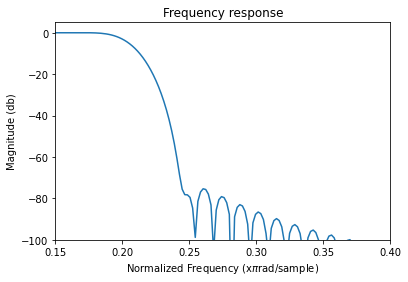

In [166]:
order, window_type, shift = filter_brute_force()
print('Order - ', order, 'Window type - ', window_type, 'Shift - ', shift)

b = signal.firwin(order, shift , pass_zero = 'lowpass', window = window_type)
filter_analyse(b, graph = True)

In [190]:
order_min = 1000
for i in range(1, 200): 
    for order in range(101, 201, 2):
        res = filter_analyse(signal.firls(order,[0, 0.001 * i, 0.24, 1], [1, 1, 0, 0]))
        if res:
            if order_min > order:
                data = (order, 0.001 * i) 
                order_min = order
            break
    
    
print(data)

(123, 0.17300000000000001)


Order -  123 Shift -  0.17300000000000001


True

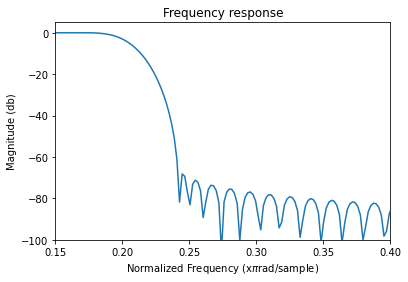

In [194]:
order, shift = data
print('Order - ', order, 'Shift - ', shift)
filter_analyse(signal.firls(order,[0, shift, 0.24, 1], [1, 1, 0, 0]), graph = True)

In [196]:
order_min = 1000
for i in range(1, 200): 
    for order in range(101, 201, 2):
        res = filter_analyse(signal.firwin2(order,[0, 0.001 * i, 0.24, 1], [1, 1, 0, 0]))
        if res:
            if order_min > order:
                data = (order, 0.001 * i) 
                order_min = order
            break
    
    
print(data) - #same

(123, 0.17300000000000001)
